The given dataset contains demographic information about the patients of a clinic.

Our target is to generate a neural network model to predict the percentage of patients at the clinic who will use online appointments.

**Summary of the model:**

1. Relaced cells with values 0f -97 & -98 to NaN.
2. Generated a dataframe.
3. Dropped the rows with null values. 
4. Converted categorical variable (vendor) to numerical variables.
5. Divided dataset to train and validation/test sets in 60-40 ratio.
6. Generated a baseline model.
7. Generated a regularized model.


**Naive Approach:** For the given dataset we are to predict the percentage of patients at the clinic who will use online appointments. 

Thus, the naive approach is that the model's **'Mean Absolute Error' shoud be lesser than the dataset's 'Mean Average Deviation'.** 



**Baseline Model:**

1. The baseline model built has a val_MAE 0.06756 . LOWER than the data's MAD which is 0.6759.
2. Also there doesn't seem to be much of over-fitting.

**Regularized model:**

1. We increased the number of hidden layers and nodes per layer to the model.
2. L1 regularization has been implemented, to identify uninformative features and force their weights to be zero by subtracting a small amount from the weight at each iteration, eventually making it zero.
3. Learning rate was determined which is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
4. The regularized model built has a val_MAE of 0.6746. LOWER than the data's MAD which is 0.6759. Also LOWER than baseline model's val_MAE.
5. Tnere does not seem to be over-fitting.

**Analysis:**

All the 3 models more or less work efficiently to predict the target variable. However, the regularized model has the least val_MAE. Hence, we choose that to be the best model.

1. Importing the required liabraries

In [ ]:
%tensorflow_version 2.X
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.8.2


2. Loading the dataset and generating a dataframe

In [ ]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

concrete_dataframe = pd.read_excel("OnlineUse.xlsx", "OnlineUseData")

concrete_dataframe = concrete_dataframe.reindex(np.random.permutation(concrete_dataframe.index))

In [ ]:
concrete_dataframe # Displaying the dataframe

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
6248,6254,0.23,0.51,0.04,0.05,0.17,0.28,0.19,0.14,0.11,...,0.73,0.74,0.60,0.51,0.80,0.66,0.51,0.56,EMIS,7012
4833,4839,0.02,0.43,0.00,0.08,0.12,0.12,0.24,0.13,0.14,...,0.86,0.91,0.91,0.55,0.85,0.58,0.49,0.31,EMIS,13813
369,375,0.30,0.54,0.07,0.14,0.17,0.17,0.16,0.21,0.10,...,0.79,0.99,0.90,0.55,0.67,0.87,0.54,0.60,EMIS,13430
3678,3684,0.15,0.50,0.06,0.09,0.26,0.30,0.13,0.10,0.07,...,0.94,0.79,0.30,0.45,0.89,0.55,0.78,0.47,EMIS,3936
1715,1721,0.08,0.56,0.02,0.10,0.11,0.07,0.12,0.16,0.23,...,0.85,0.71,0.98,0.63,0.80,0.56,0.46,0.20,EMIS,10525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,6449,0.14,0.52,0.00,0.19,0.08,0.21,0.10,0.16,0.13,...,0.58,0.79,0.83,0.57,0.82,0.51,0.59,0.38,EMIS,9462
3606,3612,0.24,0.50,0.03,0.10,0.08,0.18,0.21,0.18,0.13,...,0.65,0.83,0.93,0.50,0.93,0.41,0.39,0.66,EMIS,13159
5704,5710,0.02,0.49,0.03,0.05,0.10,0.11,0.20,0.23,0.15,...,0.42,0.62,0.97,0.64,0.81,0.57,0.39,0.43,EMIS,6054
6637,6643,0.15,0.53,0.08,0.15,0.23,0.21,0.18,0.09,0.10,...,0.65,0.63,0.45,0.45,0.81,0.53,0.27,0.33,TPP,11390


In [ ]:
concrete_dataframe.shape[0]

6857

3. Dropping observations with no values

In [ ]:
concrete_dataframe = concrete_dataframe.dropna()

In [ ]:
concrete_dataframe.shape[0]


6360

In [ ]:
concrete_dataframe = concrete_dataframe.drop(columns = ['ClinicID'])
concrete_dataframe.shape

(6360, 21)

In [ ]:
print(concrete_dataframe.dtypes)

OnlineAppointmentUse    float64
malepct                 float64
unemp                   float64
age16to24               float64
age25to34               float64
                         ...   
reducedability          float64
prefgpalways            float64
bcaaware                float64
vendor                   object
numpats                   int64
Length: 21, dtype: object


4. Converting Object variables above to Integer variables

In [ ]:
concrete_dataframe["vendor"] = concrete_dataframe["vendor"].astype("category")

In [ ]:
concrete_dataframe["vendor"].cat.categories

Index(['EMIS', 'EMIS (I)', 'MICROTEST', 'TPP', 'VISION', 'VISION (I)'], dtype='object')

In [ ]:
concrete_dataframe["vendor"].replace(['EMIS', 'EMIS (I)', 'MICROTEST', 'TPP', 'VISION', 'VISION (I)'], [0, 1, 2, 3, 4, 5], inplace=True)



In [ ]:
concrete_dataframe["vendor"] = concrete_dataframe["vendor"].astype("int64")
concrete_dataframe.dtypes


OnlineAppointmentUse    float64
malepct                 float64
unemp                   float64
age16to24               float64
age25to34               float64
                         ...   
reducedability          float64
prefgpalways            float64
bcaaware                float64
vendor                    int64
numpats                   int64
Length: 21, dtype: object

5. Splitting the dataset to training and validation sets

In [ ]:
x = concrete_dataframe.drop(columns=["OnlineAppointmentUse"])
y = concrete_dataframe["OnlineAppointmentUse"]

In [ ]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [ ]:
print("Training examples summary:")
display.display(train_x.describe())
print("Validation examples summary:")
display.display(valid_x.describe())

print("Training targets summary:")
display.display(train_y.describe())
print("Validation targets summary:")
display.display(valid_y.describe())

Training examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
count,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00,3816.00
mean,0.49,0.04,0.10,0.16,0.16,0.18,0.16,0.13,0.07,0.03,0.72,0.77,0.76,0.53,0.83,0.60,0.49,0.42,1.31,8889.49
std,0.06,0.04,0.05,0.07,0.06,0.04,0.04,0.05,0.03,0.02,0.19,0.12,0.25,0.08,0.08,0.10,0.19,0.16,1.53,5414.80
min,0.25,0.00,0.00,0.00,0.02,0.02,0.01,0.00,0.00,0.00,0.10,0.20,0.01,0.21,0.34,0.31,0.02,0.02,0.00,1684.00
25%,0.46,0.01,0.07,0.11,0.12,0.15,0.13,0.10,0.05,0.02,0.59,0.70,0.63,0.47,0.79,0.53,0.36,0.30,0.00,5158.50
50%,0.49,0.03,0.10,0.15,0.16,0.18,0.16,0.13,0.07,0.03,0.75,0.79,0.87,0.53,0.84,0.60,0.48,0.42,0.00,7835.50
75%,0.53,0.06,0.13,0.20,0.20,0.20,0.19,0.16,0.10,0.04,0.87,0.86,0.95,0.58,0.89,0.66,0.62,0.53,3.00,11334.75
max,0.72,0.36,0.72,0.61,0.44,0.35,0.31,0.29,0.20,0.11,1.00,1.00,1.00,0.79,1.00,1.00,0.98,0.88,4.00,73488.00


Validation examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
count,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00
mean,0.49,0.04,0.10,0.16,0.17,0.18,0.16,0.13,0.07,0.03,0.72,0.77,0.75,0.53,0.83,0.60,0.50,0.42,1.28,8785.19
std,0.06,0.04,0.06,0.07,0.06,0.04,0.04,0.05,0.03,0.02,0.19,0.12,0.25,0.08,0.08,0.10,0.18,0.16,1.53,5345.99
min,0.30,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.06,0.00,0.00,0.21,0.44,0.29,0.05,0.01,0.00,1272.00
25%,0.45,0.01,0.07,0.11,0.12,0.15,0.13,0.10,0.05,0.02,0.58,0.70,0.63,0.47,0.78,0.53,0.36,0.30,0.00,5013.50
50%,0.49,0.03,0.10,0.15,0.16,0.18,0.16,0.13,0.07,0.03,0.74,0.79,0.86,0.53,0.84,0.59,0.49,0.42,0.00,7746.50
75%,0.53,0.06,0.13,0.20,0.20,0.21,0.19,0.16,0.10,0.04,0.87,0.86,0.94,0.58,0.89,0.66,0.63,0.53,3.00,11187.00
max,0.78,0.53,0.61,0.69,0.39,0.35,0.31,0.31,0.19,0.14,1.00,1.00,1.00,1.00,1.00,1.00,0.98,0.88,5.00,60717.00


Training targets summary:


count   3816.00
mean       0.14
std        0.09
min        0.00
25%        0.07
50%        0.12
75%        0.19
max        0.62
Name: OnlineAppointmentUse, dtype: float64

Validation targets summary:


count   2544.00
mean       0.14
std        0.09
min        0.00
25%        0.07
50%        0.12
75%        0.19
max        0.61
Name: OnlineAppointmentUse, dtype: float64

6. Determimg the baseline model and fitting the data to the model

In [ ]:
baseline_model = keras.Sequential([ 
    keras.layers.Dense(20, activation=tf.nn.relu, input_shape=(train_x.shape[1],)),
    keras.layers.Dense(20, activation=tf.nn.relu,), 
    keras.layers.Dense(20, activation=tf.nn.relu,),
    keras.layers.Dense(20, activation=tf.nn.relu,),
    keras.layers.Dense(20, activation=tf.nn.relu,), 
    keras.layers.Dense(20, activation=tf.nn.relu,), 
    keras.layers.Dense(20, activation=tf.nn.relu,), 
    keras.layers.Dense(1)])


baseline_model.compile(loss='mse', 
                optimizer="rmsprop", 
                metrics=['mae']) 


In [ ]:
baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 20)                420       
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dense_19 (Dense)            (None, 20)                420       
                                                                 
 dense_20 (Dense)            (None, 20)                420       
                                                                 
 dense_21 (Dense)            (None, 20)                420       
                                                                 
 dense_22 (Dense)            (None, 20)               

In [ ]:
epochs = 100

baseline_history = baseline_model.fit(train_x,
                    train_y,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (valid_x, valid_y))



Epoch 1/100
120/120 [==============================] - 2s 4ms/step - loss: 1125.1797 - mae: 8.0852 - val_loss: 249.9496 - val_mae: 13.4904
Epoch 2/100
120/120 [==============================] - 0s 4ms/step - loss: 40.1111 - mae: 2.5355 - val_loss: 0.0076 - val_mae: 0.0665
Epoch 3/100
120/120 [==============================] - 0s 4ms/step - loss: 52.0418 - mae: 1.9352 - val_loss: 0.7359 - val_mae: 0.7214
Epoch 4/100
120/120 [==============================] - 0s 4ms/step - loss: 8.6213 - mae: 1.4816 - val_loss: 0.0081 - val_mae: 0.0669
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 9.3320 - mae: 0.8027 - val_loss: 0.0446 - val_mae: 0.1781
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 4.4908 - mae: 0.9378 - val_loss: 0.7111 - val_mae: 0.7179
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 2.1692 - mae: 0.8343 - val_loss: 0.0073 - val_mae: 0.0655
Epoch 8/100
120/120 [==============================] - 0s 3ms

In [ ]:
print(min(baseline_history.history['val_mae'])) 

0.0655103474855423


In [ ]:
train_y.mad() # mean average deviation (error if I use the average for prediction)

0.06759327568852969

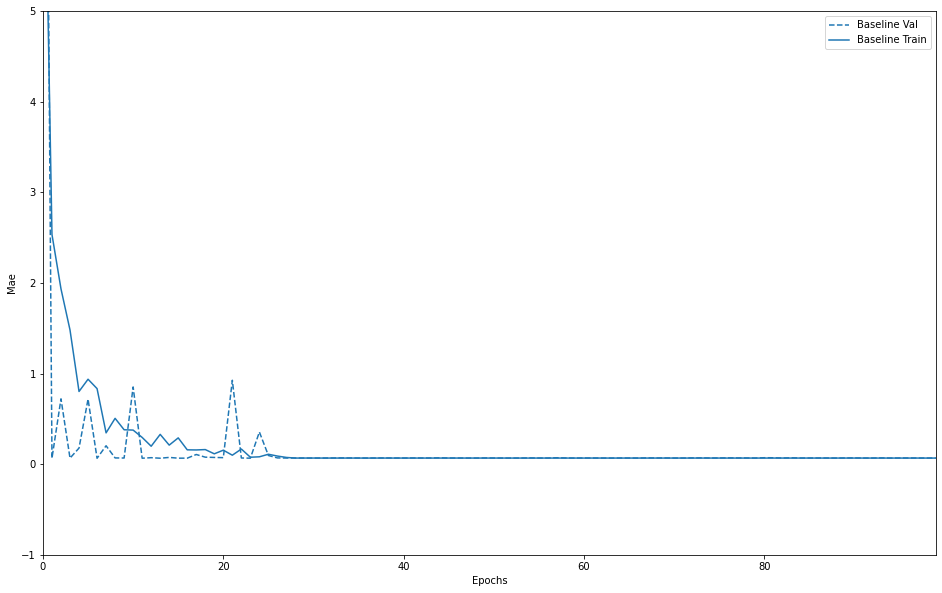

In [ ]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mae'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([-1,5])

plot_history([('baseline', baseline_history)])

7. Trying to regularize the model

In [ ]:
l1_model = keras.Sequential([ keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu,
                       input_shape=(train_x.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l1_model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mae'])

In [ ]:
l1_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                672       
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 32)               

In [ ]:
epochs = 100

l1_history = l1_model.fit(train_x,
                    train_y,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (valid_x, valid_y))



Epoch 1/100
120/120 [==============================] - 2s 5ms/step - loss: 1096.1980 - mae: 13.4614 - val_loss: 2203.1067 - val_mae: 40.0643
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 143.2902 - mae: 4.2848 - val_loss: 1.0468 - val_mae: 0.7374
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 19.7493 - mae: 2.1229 - val_loss: 0.3429 - val_mae: 0.0953
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 3.5438 - mae: 0.8155 - val_loss: 0.2990 - val_mae: 0.0831
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 1.6307 - mae: 0.4657 - val_loss: 0.2593 - val_mae: 0.1249
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.4849 - mae: 0.2642 - val_loss: 0.2818 - val_mae: 0.2308
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2587 - mae: 0.1399 - val_loss: 0.2029 - val_mae: 0.1701
Epoch 8/100
120/120 [==============================] - 0s 

In [ ]:
print(min(l1_history.history['val_mae'])) 

0.06565530598163605


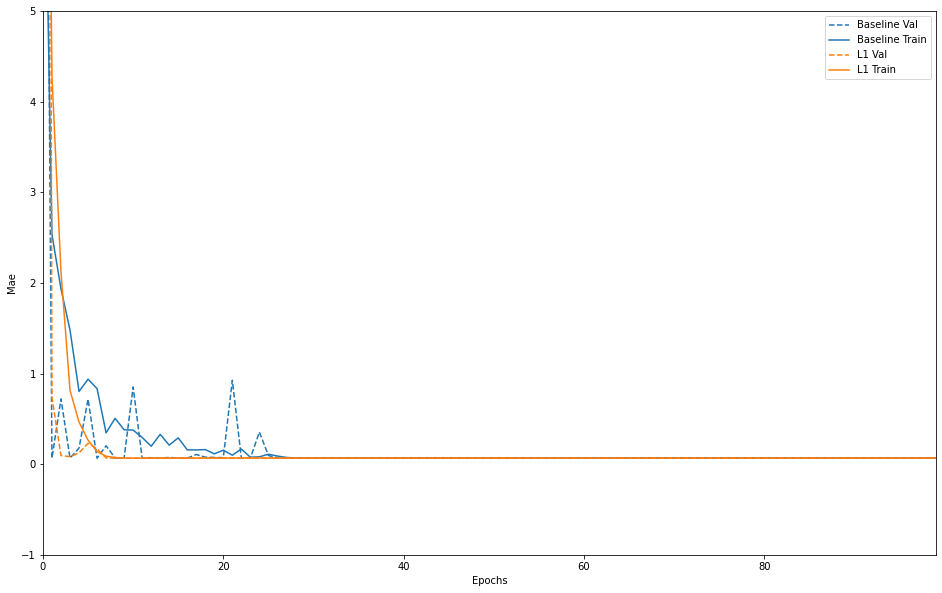

In [ ]:
# Plot history Multiple
plot_history([('baseline', baseline_history),
              ('L1', l1_history)])
             

In [ ]:
print(min(baseline_history.history['val_mae']))

0.0655103474855423


In [ ]:
train_y.mad()

0.06759327568852969

In [ ]:
print(min(l1_history.history['val_mae'])) 


0.06565530598163605
